# Projet numérique : choix du pas de temps

## Pas fixe : code informatique 

Nous devons dans un premier temps programmer le schéma de résolution numérique d'Euler explicite. Dans toute la suite des simulations et tests, nous utiliserons la fonction cosinus comme cobaye.

L'équation différentielle à résoudre est donc  \dot{x} = - sin(t)

### Euler explicite 

La programmation d'Euler explicite est plutôt simple. Nous initialisons deux tableaux à une valeur correspondant à la condition initiale. Puis nous exécutons un certain nombre d'itérations où à chaque fois nous utilisons le schéma d'Euler ###SCHEMA A RENTRER###$
pour obtenir l'approximation.

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def solve_euler_explicit(f,x0,dt) : ###code du schéma d'Euler
    x=x0
    t=0
    X=[x]
    T=[t]
    for i in range (10000) :
        x=x+dt*f(x,t)
        t+=dt
        X.append(x)
        T.append(t)
    return X, T

In [3]:
def f(x,t):                ###Définition de la fonction f régissant notre équation différentielle
    return -math.sin(t)

<function matplotlib.pyplot.show(*args, **kw)>

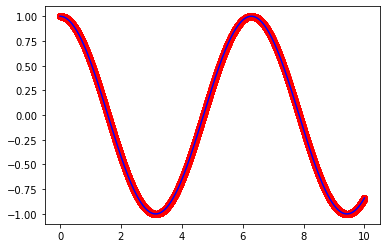

In [4]:
X, T = solve_euler_explicit(f,1,10**-3)  ###Observation graphique de la résolution par Euler explicite
X1=[math.cos(t) for t in T]
plt.plot(T,X, color='r', marker ='o') #rouge : fonction par résolution numérique
plt.plot(T,X1, color='b')             #bleu : fonction réelle
plt.show

On observe dans un premier temps le résultat graphiquement : c'est plutôt convenable avec en bleu la courbe réelle calculée en faisant appel à la banque math, et en rouge la courbe déterminée à partir du schéma d'Euler.

##### Evalutation de l'erreur 

On cherche à quantifier l'évolution de l'erreur en fonction du pas de temps choisi. Pour ceci, nous avons créé une fonction auxiliaire pour simplifier le code, qui permet de déterminer l'erreur maximale pour une certaine simulation avec un certain pas de temps.

In [5]:
def max_error_euler(f,x0,dt) :
    X,T = solve_euler_explicit(f,x0,dt)
    X1=[math.cos(t) for t in T]
    maxi=0
    for i in range (len(T)) :
        compar=abs(X[i]-X1[i])
        if compar>maxi :
            maxi=compar
    return maxi

Nous avons ensuite rempli un tableau des différentes erreurs pour différents pas de temps répertoriés dans le tableau dT, puis tracé ces erreurs en fonction du pas de temps.

<function matplotlib.pyplot.show(*args, **kw)>

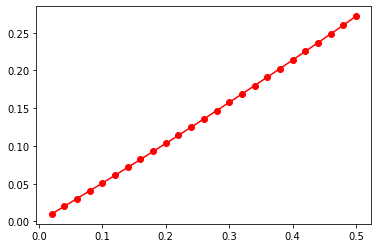

In [6]:
dT=[]
i=0
while i<0.5 :
    i+=0.02
    dT.append((i))
ERR=[((max_error_euler(f,1,t))) for t in dT ]

plt.plot (dT,ERR, color = 'r', marker = 'o')
plt.show

Observation : Le schéma d'Euler est d'ordre 1. Nous obtenons une évolution de l'erreur relativement linéaire, ce qui est cohérent avec l'ordre de ce schéma. 
Une manipulation pertinente serait de passer en echelle log. L'ordre du schéma apparait alors être simplement la pente de la droite obtenue. Le tracé en log nous parait cependant douteux, la tête de la courbe n'a pas l'air très lisible, nous en sommes donc resté à la première droite obtenue

<function matplotlib.pyplot.show(*args, **kw)>

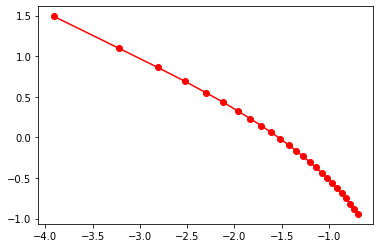

In [7]:
dT=[]
i=0
while i<0.5 :
    i+=0.02
    dT.append(math.log(i))
ERR=[(math.log(max_error_euler(f,1,t))) for t in dT ]

plt.plot (dT,ERR, color = 'r', marker = 'o')
plt.show

### Méthode d'ordre 2 : Méthode de Heun

Pour le schéma d'ordre 2, nous avons choisi la méthode de Heun. Nous avons codés similairement à la méthode d'Euler, seul le schéma change dans la fonction : #########insérer schéma########

<function matplotlib.pyplot.show(*args, **kw)>

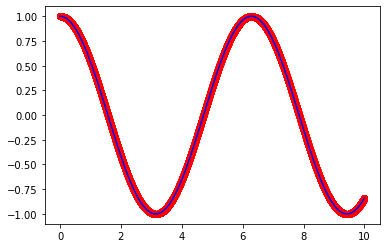

In [11]:
def solve_heun(f,x0,dt) :
    x=x0
    t=0
    X=[x]
    T=[t]
    for i in range (10000) :
        x=x+(1/2)*dt*(f(x,t)+f(x+dt*f(x,t),t+dt))
        t+=dt
        X.append(x)
        T.append(t)
    return X, T 

#place au test

X, T = solve_heun(f,1,10**-3)

T1=[i*(10**-3) for i in range (10000)]
X1=[math.cos(t) for t in T1]
plt.plot(T,X, color='r', marker ='o')
plt.plot(T1,X1, color='b')
plt.show

Encore une fois, l'observation graphique de la résolution a l'air satisfaisante. Observons l'erreur en fonction du pas de temps comme pour Euler explicite.

<function matplotlib.pyplot.show(*args, **kw)>

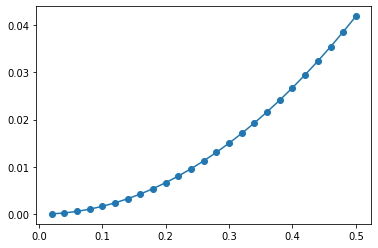

In [13]:
def max_error_heun(f,x0,dt) :  ###fonction auxiliaire pour récupérer l'erreur maximale pour un pas de temps donné
    X,T = solve_heun(f,x0,dt)
    X1=[math.cos(t) for t in T]
    maxi=0
    for i in range (len(T)) :
        compar=abs(X[i]-X1[i])
        if compar>maxi :
            maxi=compar
    return maxi

dT=[]
i=0
while i<0.5 :
    i+=0.02
    dT.append((i))
ERR2=[(max_error_heun(f,1,t)) for t in dT ]

plt.plot (dT,ERR2, marker= 'o')
plt.show

Nous obtenons ici une évolution plus parabolique, ce qui témoigne bien d'un schéma d'ordre 2.
Encore une fois, le passage en échelle log ne donne pas quelque chose de très instinctif, nous avons donc choisi d'en rester à la première allure parabolique.


## Adaptation du pas de temps

### Partie théorique

### Compréhension du code fourni
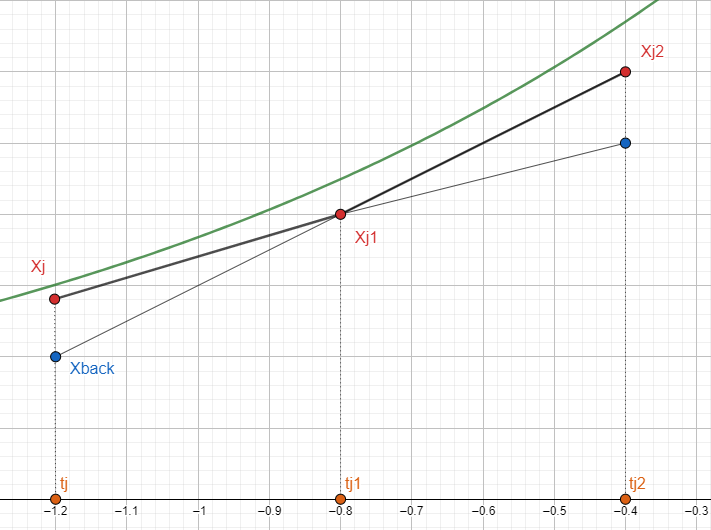

In [ ]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step : on part d'un pas de temps arbitraire qui semble correct
    ts, xs = [t0], [x0]  # storage variables : On initialise nos tableaux de valeur avec les conditions initiales
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x) #Passage classique au point suivant
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)
